# Text classification with Convolution Neural Networks (CNN)
This is a project to classify text documents / sentences with CNNs. You can find a great introduction in a similar approach on a blog entry of [Denny Britz](http://www.wildml.com/2015/12/implementing-a-cnn-for-text-classification-in-tensorflow/) and [Keras](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html). My approach is quit similar to the one of Denny and the original paper of Yoon Kim [1]. You can find the implementation of Yoon Kim on [GitHub](https://github.com/yoonkim/CNN_sentence) as well.

## Evaluation
For evaluation I used different datasets that are freely available. They differ in their size of amount and the content length. What all have in common is that they have two classes to predict (positive / negative). I would like to show how CNN performs on ~10000 up to ~200000 documents with modify only a few paramters.

I used the following sets for evaluation:
- [sentence polarity dataset v1.0](http://www.cs.cornell.edu/people/pabo/movie-review-data/)<br>
The polarity dataset v1.0 has 10662 sentences. It's quit similiar to traditional sentiment analysis of tweets because of the content length. I just splitted the data in train / validation (90% / 10%).
- [IMDB moview review](http://ai.stanford.edu/~amaas/data/sentiment/)<br>
IMDB moview review has 25000 train and 25000 test documents. I splitted the trainset into train / validation (80% / 20%) and used the testset for a final test.
- [Yelp dataset 2017](https://www.yelp.com/dataset)<br>
This dataset contains a JSON of nearly 5 million entries. I splitted this JSON for performance reason to randomly 200000 train and 50000 test documents. I selected ratings with 1-2 stars as negative and 4-5 as positive. Ratings with 3 stars are not considered because of their neutrality. In addition comes that this selected subset contains only texts with more than 5 words. The language of the texts include english, german, spanish and a lot more. During the training I used 80% / 20% (train / validation). If you are interested you can also check a small demo of the [embeddings](https://github.com/cmasch/word-embeddings-from-scratch) created from the training data.

## Model
The implemented [model](https://github.com/cmasch/cnn-text-classification/blob/master/cnn_model.py) has multiple convolutional layers in parallel to obtain several features of one text. Through different kernel sizes of each convolution layer the window size varies and the text will be read with a n-gram approach. The default values are 3 convolution layers with kernel size of 3, 4 and 5.<br>

I also used pre-trained embedding [GloVe](https://nlp.stanford.edu/projects/glove/) with 300 dimensional vectors and 6B tokens to show that unsupervised learning of words can have a positive effect on neural nets.

## Results
For all runs I used a learning rate reduction if their's no improvement on validation loss by factor 0.1 after 4 epochs. The optimizer for all runs was Adadelta.<br>As already described I used 5 runs to get a final mean of loss / accuracy.

### Sentence polarity dataset v1.0
| Filter Sizes | Feature Maps | Embedding | Max Words / Sequence | Batch Size / Epochs | Training<br>(loss / acc) | Validation<br>(loss / acc) |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| [3,4,5] | [10,10,10] | GloVe 300 | 15000 / 20 | 100 / 80 | 0.3505 / 0.8720 | 0.4688 / 0.7974 |
| [3,4,5] | [10,10,10] | 300 | 15000 / 20 | 100 / 80 | 0.3560 / 0.8763 | 0.5243 / 0.7786 |

### IMDB
| Filter Sizes | Feature Maps | Embedding | Max Words / Sequence | Batch Size /<br>Epochs | Training<br>(loss / acc) | Validation<br>(loss / acc) | Test<br>(loss / acc) |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| [3,4,5] | [10,10,10] | GloVe 300 | 15000 / 200 | 100 / 80 | 0.2289 / 0.9213 | 0.2963 / 0.8888 | 0.2994 / 0.8896 |
| [3,4,5] | [10,10,10] | 300 | 15000 / 200 | 100 / 80 | 0.2166 / 0.9305 | 0.3043 / 0.8883 | 0.3322 / 0.8751 |

### Yelp 2017
| Filter Sizes | Feature Maps | Embedding | Max Words / Sequence | Batch Size /<br>Epochs | Training<br>(loss / acc) | Validation<br>(loss / acc) | Test<br>(loss / acc) |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :--: |
| [3,4,5] | [10,10,10] | GloVe 300 | 15000 / 200 | 200 / 40 | 0.1733 / 0.9407 | 0.1724 / 0.9418 | 0.1793 / 0.9393 |
| [3,4,5] | [10,10,10] | 300 | 15000 / 200 | 200 / 40 | 0.1251 / 0.9583 | 0.1647 / 0.9424 | 0.1753 / 0.9384 |

### Yelp 2017 - Multiclass classification
All previous evaluations are typical binary classification tasks. The Yelp dataset comes with reviews which can be classified into five classes (one to five stars). For the evaluations above I merged one and two star reviews together to the negative class. Reviews with four and five stars are labeled as positive reviews. Neutral reviews with three stars are not considered. In this evaluation I trained the model on all five classes.
The baseline we have to reach is 20% accuracy because all classes are balanced to the same amount of samples. In a first evaluation I reached 60% accuracy. This sounds a little bit low but you have to keep in mind that in the binary classification we have a baseline of 50% accuracy. That is more than twice as much! Furthermore there is a lot subjectivity in the reviews. Take a look on the confusion matrix:

<img src="./images/yelp_confusion.png">

If you look carefully you can see that it’s hard to distinguish in one class that has surrounding classes side by side. If you wrote a negative review, when does this have just two stars and not one or three?! Sometimes it’s clear for sure but sometimes not! Therefore I calculated another result with an approach of smooth transition (+-1) for each class. If we do so, we get an accuracy of 94.71% which is similar to binary classification but not very valid.

| Filter Sizes | Feature Maps | Embedding | Max Words / Sequence | Batch Size /<br>Epochs | Training<br>(loss / acc) | Validation<br>(loss / acc) | Test<br>(loss / acc) |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :--: |
| [3,4,5] | [10,10,10] | 300 | 15000 / 200 | 200 / 50 | 0.8613 / 0.6395 | 0.9036 / 0.6179 | 0.9356 / 0.6051 |

## Conclusion and improvements
Finally CNNs are a great approach for text classification. However a lot of data is needed for training a good model. It would be interesting to compare this results with a typical machine learning approach. I expect that using ML for all datasets except Yelp getting similar results. If you evaluate your own architecture (neural network), I recommend using IMDB or Yelp because of their amount of data.<br>

Using pre-trained embeddings like GloVe improved accuracy by about 1-2% especially for small datasets. In addition comes that pre-trained embeddings have a regularization effect on training. That make sense because GloVe is trained on data which is some different to Yelp and the other datasets. This means that during training the weights of the pre-trained embedding will be updated. You can see the regularization effect in the following image:

<img src="./images/yelp_comparison.png">

If you look on the results using GloVe you can see that training / validation / test are very close to each other.

I tried to modify just a few parameters for each dataset. Increasing batch size, filter size and sequence length need a lot memory and time to train. Therefore I tried to use small values. Maybe increasing this parameters can improve results like feature maps to 100 as written in the paper [1].

If you are interested in CNN and text classification try out the dataset from Yelp! Not only because of the best result in accuracy, it has a lot metadata. Maybe I will use this dataset to get insights for my next travel :)

I'm sure that you can get better results by tuning some parameters:
- Increase feature maps
- Add / remove filter sizes
- Use another embeddings (e.g. Google word2vec)
- Increase / decrease maximum words in vocabulary and sequence
- Modify the method `clean_text`

If you have any questions or hints for improvement contact me through an issue. Thanks!

## Requirements
* Python 3.6
* Keras 2.0.8
* TensorFlow 1.1
* Scikit 0.19.1

## Usage
Feel free to use the [model](https://github.com/cmasch/cnn-text-classification/blob/master/cnn_model.py) and your own dataset. As an example you can use this [evaluation notebook](https://github.com/cmasch/cnn-text-classification/blob/master/Evaluation.ipynb).

## References
[1] [Convolutional Neural Networks for Sentence Classification](https://arxiv.org/abs/1408.5882)<br>
[2] [Neural Document Embeddings for Intensive Care Patient Mortality Prediction](https://arxiv.org/abs/1612.00467)

## Author
Christopher Masch


---

# Using ConvNet to classify real and fake reviews


### Changes to Data & Parameters

- positive and negative reviews converted to genuine and fake reviews
- monitoring max seq length
- added googlenews word2vec embedding & `USE_GOOGLE` parameter
- lessened number of epochs (40 -> 20)
- corrected `acc` to `accuracy` & `val_acc` to `val_accuracy` in testing

In [1]:
import keras, os, pickle, re, sklearn, string, tensorflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from nltk.corpus import stopwords
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.layers import Embedding
from keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split

from gensim import models

print('Keras version: \t\t%s' % keras.__version__)
print('Scikit version: \t%s' % sklearn.__version__)
print('TensorFlow version: \t%s' % tensorflow.__version__)

Using TensorFlow backend.


Keras version: 		2.3.1
Scikit version: 	0.21.2
TensorFlow version: 	2.0.0


### Preprocessing

In [2]:
def clean_doc(doc):
    """
    Cleaning a document by several methods:
        - Lowercase
        - Removing whitespaces
        - Removing numbers
        - Removing stopwords
        - Removing punctuations
        - Removing short words
    """
    stop_words = set(stopwords.words('english'))
    
    # Lowercase
    doc = doc.lower()
    # Remove numbers
    doc = re.sub(r"[0-9]+", "", doc)
    # Split in tokens
    tokens = doc.split()
    # Remove Stopwords
    tokens = [w for w in tokens if not w in stop_words]
    # Remove punctuation
    tokens = [w.translate(str.maketrans('', '', string.punctuation)) for w in tokens]
    # Tokens with less then two characters will be ignored
    tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)


def read_files(path):
    documents = list()
    # Read in all files in directory
    if os.path.isdir(path):
        for filename in os.listdir(path):
            with open('%s/%s' % (path, filename)) as f:
                doc = f.read()
                doc = clean_doc(doc)
                documents.append(doc)
    
    # Read in all lines in a txt file
    if os.path.isfile(path):        
        with open(path, encoding='iso-8859-1') as f:
            doc = f.readlines()
            for line in doc:
                documents.append(clean_doc(line))
    return documents

In [3]:
# EMBEDDING
MAX_NUM_WORDS  = 15000
EMBEDDING_DIM  = 300
MAX_SEQ_LENGTH = 200
USE_GLOVE      = True
USE_GOOGLE     = False

# MODEL
FILTER_SIZES   = [3,4,5]
FEATURE_MAPS   = [10,10,10]
DROPOUT_RATE   = 0.5

# LEARNING
BATCH_SIZE     = 200
NB_EPOCHS      = 15 #40 in original repo
RUNS           = 2
VAL_SIZE       = 0.25

In [4]:
#Yelp data management

df_train = pd.read_csv('../dat/train.csv')
df_dev = pd.read_csv('../dat/dev.csv')

trn_r = []
trn_f = []
dev_r = []
dev_f = []

for r in df_train[df_train['label']==0]['review']:
    trn_r.append(r)
for r in df_train[df_train['label']==1]['review']:
    trn_f.append(r)   
    
for r in df_dev[df_dev['label']==0]['review']:
    dev_r.append(r)
for r in df_dev[df_dev['label']==1]['review']:
    dev_f.append(r)
    
positive_docs = trn_r
negative_docs = trn_f
negative_docs_test = dev_r
positive_docs_test = dev_f


In [5]:
## Sentence polarity dataset v1.0
#negative_docs = read_files('data/rt-polarity.neg')
#positive_docs = read_files('data/rt-polarity.pos')

## IMDB
#negative_docs = read_files('data/imdb/train/neg')
#positive_docs = read_files('data/imdb/train/pos')
#negative_docs_test = read_files('data/imdb/test/neg')
#positive_docs_test = read_files('data/imdb/test/pos')

## Yelp
#negative_docs = read_files('data/yelp/train/neg')
#positive_docs = read_files('data/yelp/train/pos')
#negative_docs_test = read_files('data/yelp/test/neg')
#positive_docs_test = read_files('data/yelp/test/pos')

docs   = negative_docs + positive_docs
labels = [0 for _ in range(len(negative_docs))] + [1 for _ in range(len(positive_docs))]

print('Training samples: %i' % len(docs))

Training samples: 250874


## Tokenizer

In [6]:
def max_length(lines):
    """
    Calculate the maximum document length
    """
    return max([len(s.split()) for s in lines])

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(docs)
sequences = tokenizer.texts_to_sequences(docs)

length = max_length(docs)
word_index = tokenizer.word_index

result = [len(x.split()) for x in docs]
print('Text informations:')
print('max length: %i / min length: %i / mean length: %i / limit length: %i' % (np.max(result),
                                                                                np.min(result),
                                                                                np.mean(result),
                                                                                MAX_SEQ_LENGTH))
print('vocabulary size: %i / limit: %i' % (len(word_index), MAX_NUM_WORDS))

# Padding all sequences to same length of `MAX_SEQ_LENGTH`
data   = pad_sequences(sequences, maxlen=MAX_SEQ_LENGTH, padding='post')

Text informations:
max length: 1529 / min length: 1 / mean length: 116 / limit length: 200
vocabulary size: 128439 / limit: 15000


## Embeddings

### added GoogleNews W2V embedding for model

In [7]:
def create_pretrained_embeddings(preset='None'):
    

    embeddings_index = {}
    
    if preset == 'glove':
        print('Pretrained embeddings GloVe is loading...')
        f = open('../dat/w2v/glove.6B.%id.txt' % EMBEDDING_DIM, encoding='utf8')
    elif preset == 'google':
        print('Pretrained embeddings GoogleNews is loading...')
        f = open('../dat/w2v/GoogleNews-vectors-negative%i.txt' % EMBEDDING_DIM, encoding='utf8')
    else:
        if preset != 'None':
            print('invalid pretrained preset')
        return None
    
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()
    
    print('Found %s word vectors in'% len(embeddings_index), preset, 'embedding' )

    embedding_matrix = np.zeros((MAX_NUM_WORDS, EMBEDDING_DIM))

    for word, i in tokenizer.word_index.items():
        if i >= MAX_NUM_WORDS:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    return Embedding(input_dim=MAX_NUM_WORDS, output_dim=EMBEDDING_DIM,
                     input_length=MAX_SEQ_LENGTH,
                     weights=[embedding_matrix],
                     trainable=True
                    )

## Model definition

## Training

In [8]:
import cnn_model

histories = []

for i in range(RUNS):
    print('Running iteration %i/%i' % (i+1, RUNS))
    
    X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=VAL_SIZE, random_state=42)
    
    emb_layer = None
    if USE_GLOVE:
        emb_layer = create_pretrained_embeddings(preset='glove')
    if USE_GOOGLE:
        emb_layer = create_pretrained_embeddings(preset='google')
    
    model = cnn_model.build_cnn(
        embedding_layer=emb_layer,
        num_words=MAX_NUM_WORDS,
        embedding_dim=EMBEDDING_DIM,
        filter_sizes=FILTER_SIZES,
        feature_maps=FEATURE_MAPS,
        max_seq_length=MAX_SEQ_LENGTH,
        dropout_rate=DROPOUT_RATE
    )
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adadelta(clipvalue=3),
        metrics=['accuracy']
    )
    
    history = model.fit(
        X_train, y_train,
        epochs=NB_EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=(X_val, y_val),
        callbacks=[ModelCheckpoint('model-%i.h5'%(i+1), monitor='val_loss',
                                   verbose=1, save_best_only=True, mode='min'),
                   ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=0.01)
                  ]
    )
    print()
    histories.append(history.history)

Running iteration 1/2
Pretrained embeddings GloVe is loading...
Found 400000 word vectors in glove embedding
Creating CNN 0.0.1
#############################################
Embedding:    using pre-trained embedding
Vocabulary size: 15000
Embedding dim: 300
Filter sizes: [3, 4, 5]
Feature maps: [10, 10, 10]
Max sequence: 200
#############################################


C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 188155 samples, validate on 62719 samples
Epoch 1/15
188155/188155 [==============================] - 635s 3ms/step - loss: 0.3901 - accuracy: 0.8957 - val_loss: 0.3180 - val_accuracy: 0.8992

Epoch 00001: val_loss improved from inf to 0.31805, saving model to model-1.h5
Epoch 2/15
188155/188155 [==============================] - 620s 3ms/step - loss: 0.3270 - accuracy: 0.8964 - val_loss: 0.3198 - val_accuracy: 0.8992

Epoch 00002: val_loss did not improve from 0.31805
Epoch 3/15
188155/188155 [==============================] - 620s 3ms/step - loss: 0.3236 - accuracy: 0.8964 - val_loss: 0.3191 - val_accuracy: 0.8992

Epoch 00003: val_loss did not improve from 0.31805
Epoch 4/15
188155/188155 [==============================] - 628s 3ms/step - loss: 0.3225 - accuracy: 0.8964 - val_loss: 0.3128 - val_accuracy: 0.8992

Epoch 00004: val_loss improved from 0.31805 to 0.31275, saving model to model-1.h5
Epoch 5/15
188155/188155 [==============================] - 618s 3ms/step - loss:

C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 188155 samples, validate on 62719 samples
Epoch 1/15
188155/188155 [==============================] - 621s 3ms/step - loss: 0.3916 - accuracy: 0.8957 - val_loss: 0.3164 - val_accuracy: 0.8992

Epoch 00001: val_loss improved from inf to 0.31644, saving model to model-2.h5
Epoch 2/15
188155/188155 [==============================] - 614s 3ms/step - loss: 0.3255 - accuracy: 0.8964 - val_loss: 0.3143 - val_accuracy: 0.8992

Epoch 00002: val_loss improved from 0.31644 to 0.31432, saving model to model-2.h5
Epoch 3/15
188155/188155 [==============================] - 613s 3ms/step - loss: 0.3237 - accuracy: 0.8964 - val_loss: 0.3148 - val_accuracy: 0.8992

Epoch 00003: val_loss did not improve from 0.31432
Epoch 4/15
188155/188155 [==============================] - 642s 3ms/step - loss: 0.3219 - accuracy: 0.8964 - val_loss: 0.3145 - val_accuracy: 0.8992

Epoch 00004: val_loss did not improve from 0.31432
Epoch 5/15
188155/188155 [==============================] - 600s 3ms/step - loss:

In [9]:
with open('history.pkl', 'wb') as f:
    pickle.dump(histories, f)

## Evaluation

In [10]:
histories = pickle.load(open('history.pkl', 'rb'))

In [11]:
def get_avg(histories, his_key):
    tmp = []
    for history in histories:
        tmp.append(history[his_key][np.argmin(history['val_loss'])])
    return np.mean(tmp)
    
print('Training: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'loss'),
                                              get_avg(histories, 'accuracy')))
print('Validation: \t%0.4f loss / %0.4f acc' % (get_avg(histories, 'val_loss'),
                                                get_avg(histories, 'val_accuracy')))

Training: 	0.3189 loss / 0.8964 acc
Validation: 	0.3089 loss / 0.8992 acc


In [12]:
histories

[{'val_loss': [0.31804993420225863,
   0.319755533471259,
   0.3191327984401007,
   0.3127504791459475,
   0.3125119439700529,
   0.3287242534145637,
   0.31108994005230817,
   0.31035916509501177,
   0.31040319909191316,
   0.3196007851049432,
   0.3084015312387022,
   0.31584692230423267,
   0.3121407495956776,
   0.31240634886880037,
   0.3119199058678984],
  'val_accuracy': [0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619,
   0.8992331027984619],
  'loss': [0.39010611892820424,
   0.3270009619094668,
   0.3236224809095502,
   0.3224908741632202,
   0.3216712933551153,
   0.32124049356547546,
   0.32004185338460783,
   0.3191617003307592,
   0.31916604666578624,
   0.3189332514723318,
   0.31870363634768206,
   0.3188

In [13]:
def plot_acc_loss(title, histories, key_acc, key_loss):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    # Accuracy
    ax1.set_title('Model accuracy (%s)' % title)
    names = []
    for i, model in enumerate(histories):
        ax1.plot(model[key_acc])
        ax1.set_xlabel('epoch')
        names.append('Model %i' % (i+1))
        ax1.set_ylabel('accuracy')
    ax1.legend(names, loc='lower right')
    # Loss
    ax2.set_title('Model loss (%s)' % title)
    for model in histories:
        ax2.plot(model[key_loss])
        ax2.set_xlabel('epoch')
        ax2.set_ylabel('loss')
    ax2.legend(names, loc='upper right')
    fig.set_size_inches(20, 5)
    plt.show()

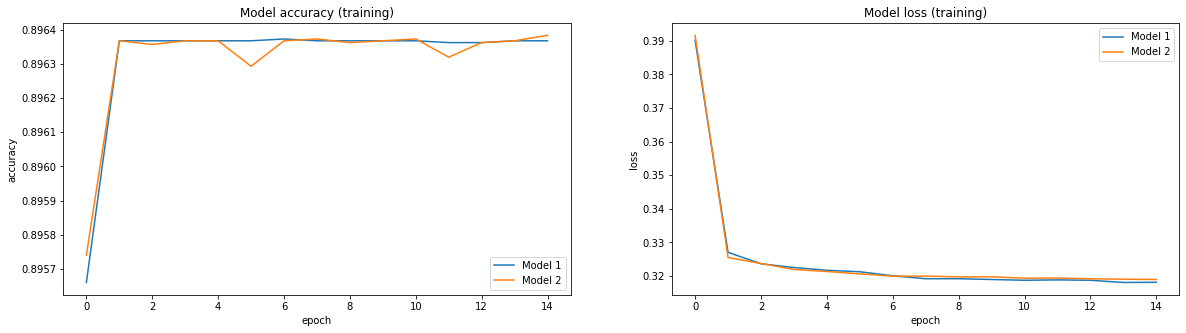

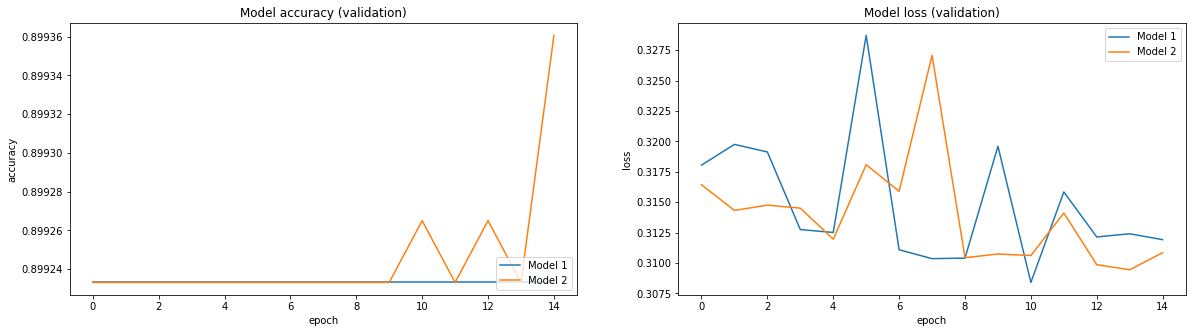

In [14]:
plot_acc_loss('training', histories, 'accuracy', 'loss')
plot_acc_loss('validation', histories, 'val_accuracy', 'val_loss')

##### Final test (IMDB / Yelp)

In [15]:
X_test = negative_docs_test + positive_docs_test
y_test = [0 for _ in range(len(negative_docs_test))] + [1 for _ in range(len(positive_docs_test))]

In [16]:
sequences_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(sequences_test, maxlen=MAX_SEQ_LENGTH, padding='post')

In [17]:
test_loss = []
test_accs = []

for i in range(0,RUNS):
    cnn_ = load_model("model-%i.h5" % (i+1))
    
    score = cnn_.evaluate(X_test, y_test, verbose=1)
    test_loss.append(score[0])
    test_accs.append(score[1])
    
    print('Running test with model %i: %0.4f loss / %0.4f acc' % (i+1, score[0], score[1]))
    
print('\nAverage loss / accuracy on testset: %0.4f loss / %0.4f acc' % (np.mean(test_loss),
                                                                        np.mean(test_accs)))
print('Standard deviation: (+-%0.4f) loss / (+-%0.4f) acc' % (np.std(test_loss), np.std(test_accs)))

C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


35918/35918 [==============================] - 18s 508us/step
Running test with model 1: 2.3479 loss / 0.1016 acc


C:\Users\Jeffs Laptop\.conda\envs\pfds\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


35918/35918 [==============================] - 18s 493us/step
Running test with model 2: 2.1700 loss / 0.1016 acc

Average loss / accuracy on testset: 2.2590 loss / 0.1016 acc
Standard deviation: (+-0.0890) loss / (+-0.0000) acc
